The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


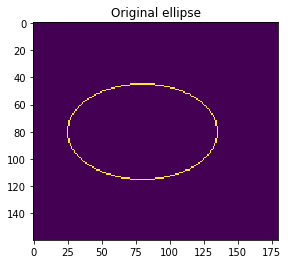

[[45, 71], [47, 64], [85, 26], [115, 71], [114, 90], [113, 96], [75, 134], [45, 89]]
[[45, 71], [47, 64], [85, 26], [115, 71], [114, 90]]
[  5.83842056e-05   1.51575087e-04  -2.95127605e-05  -7.52132598e-03
  -2.18534577e-02   1.00000000e+00]
Ellipse? True
[[113, 96], [75, 134], [45, 89]]


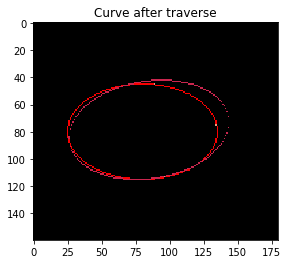

In [53]:
import test
import numpy as np
from skimage.draw import ellipse_perimeter
import matplotlib.pyplot as plt
from skimage import data, color, img_as_ubyte
import random

import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
from common.crawler import Crawler
from common.contour import Contour
import common.helper as helper
from common.curve2 import Curve2
    
    
%load_ext autoreload
%autoreload 2
    
def get_random_color():
    return [random.randint(0,255),random.randint(0,255),random.randint(0,255)]
#original = np.loadtxt("skeleton.nympy")

IMG_H = 160 
IMG_W = 180
img = np.zeros((IMG_H, IMG_W), dtype=np.uint8)
rr, cc = ellipse_perimeter(80, 80, 35, 55)
img[rr, cc] = 1
plt.title("Original ellipse");
plt.imshow(img)
plt.show()

#Find contours on picture
crawler = Crawler(img_as_ubyte(img))
crawler.MIN_LEN = 10
crawler.run()

# Draw finded contours on original image
res_img = color.gray2rgb(img_as_ubyte(img))
i = 0
for c in crawler.curves:
    contour = Contour(c)
    res_img = contour.draw_on_image(res_img,[250,0,0])
    i = i + 125
    points = contour.get_valuable_points()
    print points
    
    for mark in range(0,len(points),5):
        five = points[mark:mark+5]
        print five
        color = get_random_color()
        for point in five:
            res_img[point[0],point[1]] = color
        if len(five) == 5:
            koeff = helper.find_ellipse(helper.points2coords(five,IMG_H))
            print koeff 
            curve2 = Curve2(koeff)
            print "Ellipse? " + str(curve2.isEllipse())
            helper.draw_curve2_on_image(res_img,curve2,color)
            
    
        
    
plt.title("Curve after traverse");
plt.imshow(res_img)
plt.show()



